# Project: Investigate a Dateset (Titanic Data)

## Problem Statement

In this project, we are going to investigate the Titanic dataset which is from the Kaggle website. We will try to figure out that what factors made people more likely to survive? In particular, we choose to investigate the Pclass, Sex and Age and their relationships with survive rate. The steps are as follows: data load and data check, data wrangling and data exploration. Finally, we draw the conclusions based on our investigation.

## Data load and data check

### Data load

In [16]:
#load the data
import pandas as pd
df=pd.read_csv('Desktop/titanic-data.csv')

### Data check

#### Data overview

In [17]:
#overview the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Observiations from the data overview
We have several observiations. First, there are total 891 rows and 12 columns.The items of Pclass, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked and Cabin are the possible factors which affect the survive rate. Second, there are missing values in Age and Cabin. 

In [18]:
# the non-NULL values in Age
len(df['Age'].dropna())

714

In [19]:
# the non-NULL values in Cabin
len(df['Cabin'].dropna())

204

As we can see that there are 714 and 204 non-NULL values in Age and Cabin, respectively. Therefore, we need to drop the missing values in Age before analyzing the data. Since there are too many missing values in Cabin, it will not be considered. Finally, in this project, we choose to investigate Pclass, Sex and Age and their relationships with survive rate.  

## Data wrangling 

### Remove columns

In [20]:
#drop the features which are not going to be considered in the project
df=df.drop(['SibSp','Parch','Ticket','Fare','Embarked','Cabin'],axis=1)

### Remove NAN values

In [21]:
#drop the NAN values
df=df.dropna()

## Data exploration

In [22]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as p

### Visualization for Overall Survive Rate

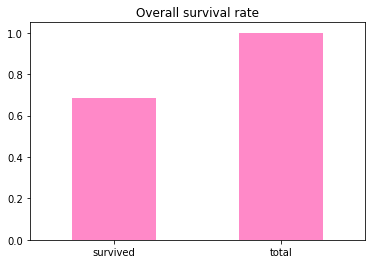

In [23]:
#Overall survival rate
total=df['Survived'].value_counts()
survival=df.Survived.sum()
survive_rate=survival/total
fig_1=survive_rate.plot(kind='bar',title='Overall survival rate',color='deeppink',alpha=0.5)
fig_1.set_xticklabels(['survived','total'],rotation=0)
p.show()

It is shown in the figure that the overall survival rate is more than 0.6.

### Visualization for Survive by Sex

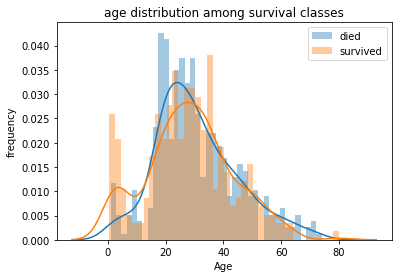

In [24]:
sns.distplot(df.Age[df['Survived']==0],bins=40)
sns.distplot(df.Age[df['Survived']==1],bins=40)
plt.title('age distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['died','survived'])
p.show()

It is shown that children have a higher survival rate. To have a more clear observation, we have a violin plot.

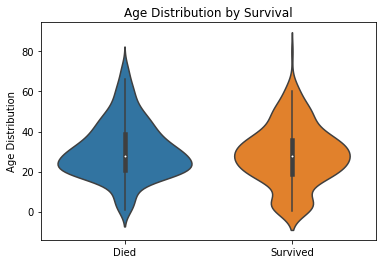

In [25]:
fig_2=sns.violinplot(data=df,x='Survived',y='Age')
fig_2.set(title='Age Distribution by Survival',xlabel='',ylabel='Age Distribution',xticklabels=['Died','Survived'])
p.show()

It is also shwon that children have a higher survival rate.

### Visualization for Survive by Pclass

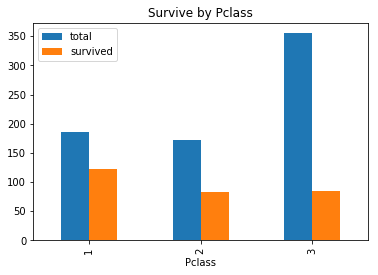

In [26]:
#comaprison of total passengers and survived passengers for different Pclass
Pclass_count=df.groupby('Pclass')['Survived'].count()
Pclass_sum=df.groupby('Pclass')['Survived'].sum()
Pclass_data=pd.concat([Pclass_count,Pclass_sum],axis=1)
Pclass_data.columns=['total','survived']
Pclass_data.plot(kind='bar')
plt.title('Survive by Pclass')
p.show()

From the figure, we observe that the Pclass 3 has the most of the 
total passengers. However, it has the least survive rate compared to the other two Pclass. 
In addition, we observe that the Pclass 1 has the highest survive rate.

### Statistic for Survive by Pclass

In [28]:
Pclass_survive_rate=Pclass_sum/Pclass_count
Pclass_survive_rate

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

The above results for survive rate for Pclass show that the survive rates for Pclass 1 and Pclass 3 are highest and lowest, respectively. This result concides with the visualization with figure.

### Visualization for survive by sex

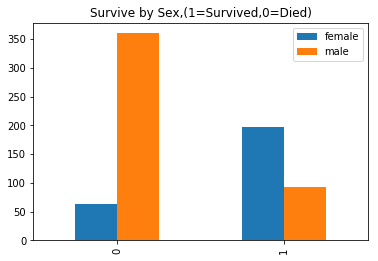

In [29]:
#comaprison of survived and died for female and male 
female_value=df.Survived[df.Sex=='female'].value_counts()
male_value=df.Survived[df.Sex=='male'].value_counts()
all_value=pd.concat([female_value,male_value],axis=1)
all_value.columns=['female','male']
all_value.plot(kind='bar')
plt.title('Survive by Sex,(1=Survived,0=Died)')
p.show()

As we can see from the figure, the amount of survived male is only almost the half of that of the survived female. However, the amount of the died male is much more than that of female. That means female has a higher survive rate than male.

### Statistic for survive by sex

In [30]:
Sex_survive_rate=df.groupby('Sex')['Survived'].sum()/df.groupby('Sex')['Survived'].count()
Sex_survive_rate

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

It is shown that the female has a much higher survive rate than that of man, which validates our observations in the figure.

### Visualization for survival by combination of Pclass and Sex

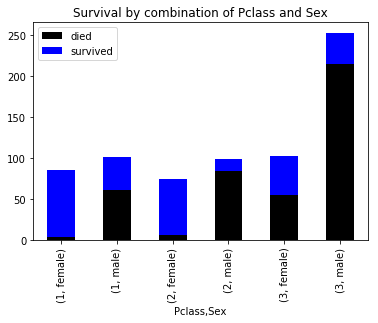

In [31]:
fig_3=pd.crosstab([df.Pclass,df.Sex],df.Survived)
fig_3.plot(kind='bar',stacked=True,color=['black','blue'])
plt.title('Survival by combination of Pclass and Sex')
plt.legend(['died','survived'])
p.show()

First, we observe that survial rate of female is higher than that of male. Second, it is shwon that the people in Pclass 1 have a higher survive rate than the other two Pclass.

## Conclusions
Based on both visualization and statistic study, we oberve some interesting results for the titanic data set, for example, female and lower number of Pclass made people more likely to survive. However, there are limitations of my analysis. First, there are missing observations in our data. It is reported that there were between 2200 and 2340 passengers and crew members on board the Titanic when it sunk. Therefore, there are more than 1000 passengers are not in the data set. Second, there are missing features which are related to the survial rate in our data. For example, the passengers' location when the Titanic was sinking. Finally,there are missing values in our data. For example, there are total 76 and 686 missing values in Age and Cabin, respectivly. To verify if the conclusions drawn from this initial data exploration are true, we can employ the hypothesis tests. 
